In [ ]:
!pip install matplotlib
!pip install nltk
!pip install 

# Q1 Build a Table of Contents

This section will demonstrate the implementation of our tree to build TOC. The text chosen to demonstrate the capability of the code is *-	Machine Learning* by Tom M. Mitchell. 

***1. Tree Design***

Our tree implementation follows “Case A" from the project requirements. All the entries in TOC were represented by single Node:
-Book title 
-Chapters
-Subsections

*Node Class:* Each Node object stores its title (the text that will be printed in TOC e.g., "Designing a Learning System"), its num_str (it’s the hierarchical numbering e.g., "1.2"), a pointer to its parent node, and a children dictionary.

*Toc Tree Class:* This class holds the root node of the tree e.g., Book tittle and orchestrates all operations. This class acts as the main interface.

*Children Dictionary:* We chose a Python dictionary for the children attribute. This allows for efficient O(1) average-case lookup and insertion of child nodes. The key is the subsection number (e.g., for node "1", the key for its child "1.2" is `"2"`).

*nodes_by_title Dictionary:* The TocTree class maintains a dictionary called nodes_by_title to implement an efficient depth() function as required,  This dictionary maps a unique key, `(num_str, title)`, to its corresponding Node object. This allows us to find any node in the tree in O(1) average time without having to traverse the tree.

***2. Insertion Strategy***

The insert (path, title) method is responsible for building TOC dynamically from TOC entries extracted from the textbook.
-	The method receives a path (e.g., ['1', '2', '1']) and a title (e.g., "Choosing the Training Experience").
-	Starting from the root, it walks through the tree according to the values in the path.
-	If a node in the path does not yet exist (e.g., "1.2" when inserting "1.2.1"), the method automatically creates the missing node and assigns a temporary placeholder title (e.g., "Section 1.2").
-	If the node already exists but currently holds a placeholder title, the method replaces it with the correct title from the input data. This allows the tree to be constructed correctly even when the TOC entries are processed in a non-sequential or unordered manner.

***3. Traversal Method***

To display the TOC, the `print_toc()` method performs a *Preorder Depth-First Search (DFS)* using recursion. The reason why went for this approach is because preorder naturally matches the way a Table of Contents is read: *process the current heading first, then explore its subsections*.

The algorithm follows this sequence:

1. Print the current node (e.g., `"1. Introduction"`).
2. Recursively print all of its children (e.g., `"1.1"`, `"1.2"`, `"1.3"`, ...).

Because TOC numbering must follow chapter → section → subsection order, the children are sorted using `sorted(..., key=int)` to guarantee numerical ordering (so `"2"` correctly appears before `"10"`, not after).

This approach ensures that the tree structure is displayed exactly as a human expects to navigate a Table of Contents.

***4. Included Methods***

*`height()`:* Computes the overall height of the TOC tree — defined as the length of the longest path from the root to any leaf.
  A recursive helper (`_height_recursive()`) evaluates each node using:

  > `height(node) = 1 + max(height(child))`

  The base case for a leaf node is `0`. This allows the method to determine how many hierarchical levels exist in the entire TOC.

*`depth(num_str, node_title)`:* Returns how deep a specific node is within the tree. Using the `nodes_by_title` dictionary, the node is located in *O(1)* time without searching. Once retrieved, the method walks upward through the `parent` pointers and counts how many levels it takes to reach the root, yielding the node’s depth.

# Q1 Testing

***Imports***

In [ ]:
from q1_tree import TocTree
from q1_dataextract import create_toc

***Creating TOC***

In [ ]:
book_title = "Machine Learning"
my_toc = TocTree(book_title)

create_toc(my_toc)

***Displaying in Plain Mode***

In [ ]:
# Display: 'plain'
my_toc.print_toc(mode='plain')

***Displaying in Indented Mode***

In [ ]:
# Display: 'indented'
my_toc.print_toc(mode='indented')

***Displaying in Indented_Num Mode***

In [ ]:
# Display: 'indented_num'
my_toc.print_toc(mode='indented_num')

***Tree Height and Depth Demonstration***

In [ ]:
print(f"Total Height of the tree (max depth): {my_toc.height()}")

***Depth Testing for Sample Nodes***

In [ ]:
print(f"Depth of 4.5.1 A Differentiable Threshold Unit': {my_toc.depth('4.5.1', 'A Differentiable Threshold Unit')}")
print(f"Depth of 3.7 Issues in Decision Tree Learning': {my_toc.depth('3.7', 'Issues in Decision Tree Learning')}")
print(f"Depth of 4 Artificial Neural Networks': {my_toc.depth('4', 'Artificial Neural Networks')}")
print(f"Depth of {book_title}' (Root): {my_toc.depth('0', book_title)}")
print(f"Depth of 'Non-existent Title': {my_toc.depth('10', 'Title')}")

# Q2 Letters and Words Analysis 

This section will demonstrate the implementation of our text analysis package. The text chosen to demonstrate the capability of the code is *Pride and Prejudice* by Jane Austen. Before any analysis can be done, we need to do some preprocessing. 

**Preprocessing**

This module takes the full txt file of the novel and reads it in as a string. The code then turns all characters into lower-case, removes punctuation, symbols, and numbers, and stopwords. The stopwords come from the nltk dictionary of common stopwords like "the", "and", "is". The string is then converted to tokens, giving a list of words separated by whitespace. 

The input to this function is the text, and the output is a single long string containing the entire text. The function also prints the number of tokens before/after preprocessing. 

**Text analysis**

The textanalysis.py module is where the analysis comes in. It is capable of listing the most common letters, words, bigrams, and trigrams. The class *TextAnalysis()* is initialized with the full string output given by the preprocessing module. Each function can return both a visualization and a table. These can be changed by setting the parameters *plot* and *table* to False. Both of these parameters are found in every function. 

Before we get started, note that above this cell are install statements for outside modules that are used. If these modules are not installed already, please do so by running the top cell. 

First, load the modules, run preprocessing, and instantiate the analysis class: 


In [11]:
from src.book_analysis.textanalysis import TextAnalysis
from src.book_analysis import textpreprocessing
import matplotlib.pyplot as plt

# The modules depend on stopwords, which are found in the nltk library
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/klow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Run text preprocessing on Pride and Prejudice
txt = textpreprocessing.txt_preprocessing(txt_file = 'src/book_analysis/data/PrideAndPrejudice.txt')

# Create an instance of TextAnalysis with the preprocessed text
txt_analysis = TextAnalysis(txt)

Before removing stopwords, there were 122311 tokens.
After removing the stopwords, there were 55430 tokens.


### 1. Letter Frequencies

This function shows the frequencies of letters (a-z), plots a bar graph, and returns a table. 

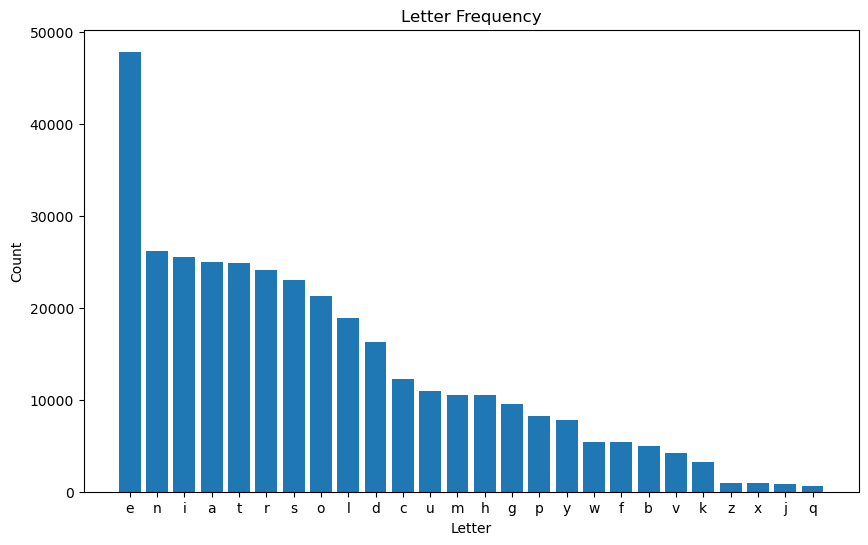

,Letter,Count
0,e,47821
1,n,26179
2,i,25546
3,a,24944
4,t,24832
5,r,24133
6,s,23011
7,o,21306
8,l,18899
9,d,16282


In [13]:
# Find frequencies of letters a-z
txt_analysis.lettercounter(table = True, plot = True)

### 2. Common Words 

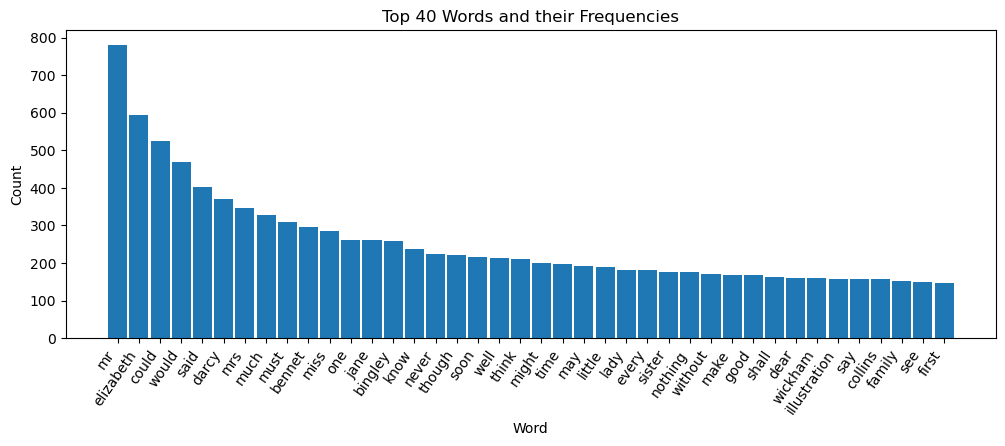

,Words,Count
0,mr,781
1,elizabeth,595
2,could,524
3,would,469
4,said,402
5,darcy,370
6,mrs,346
7,much,329
8,must,309
9,bennet,296


In [14]:
# Find the 40 most common words and their frequencies
txt_analysis.wordcounter()

### 3. Bigrams and Trigrams

The following functions count and display the most common bigrams and trigrams. The function is called kgramcounter, because it can handle k-grams, or sequences of consecutive words of any length. This parameter is k. Here we use k=2 for bigrams, and k=3 for trigrams. 

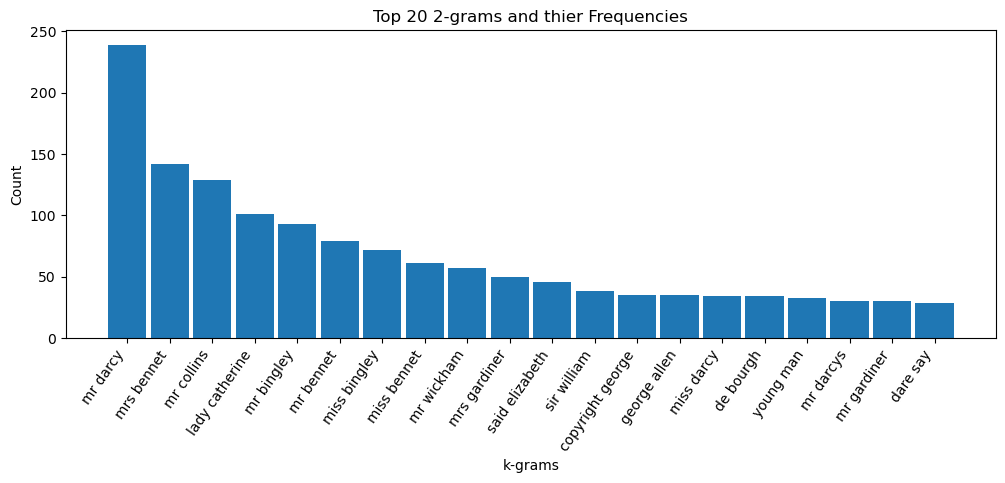

,K-gram,Count
0,mr darcy,239
1,mrs bennet,142
2,mr collins,129
3,lady catherine,101
4,mr bingley,93
5,mr bennet,79
6,miss bingley,72
7,miss bennet,61
8,mr wickham,57
9,mrs gardiner,50


In [15]:
# Find the 20 most common bigrams and their frequencies
txt_analysis.kgramcounter(k = 2)

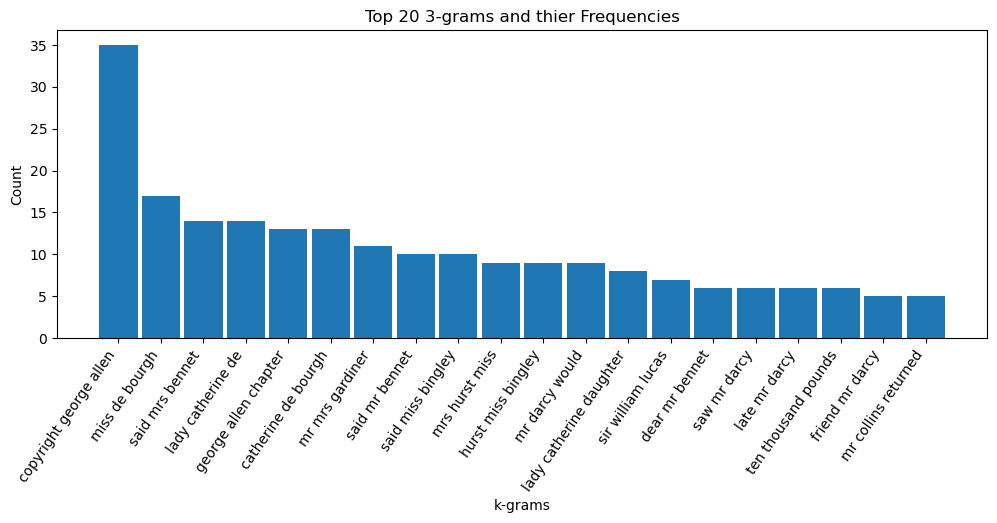

,K-gram,Count
0,copyright george allen,35
1,miss de bourgh,17
2,said mrs bennet,14
3,lady catherine de,14
4,george allen chapter,13
5,catherine de bourgh,13
6,mr mrs gardiner,11
7,said mr bennet,10
8,said miss bingley,10
9,mrs hurst miss,9


In [16]:
# Find the 20 most common trigrams and their frequencies
txt_analysis.kgramcounter(k = 3)

## 4. Operation Complexity

### Text Preprocessing
The time complexity is $O(n)$ because each preprocessing step traverses the entire string containing the book's raw text.

The space complexity is $O(1)$ because the amount of space required for storing additional variables is constant and not proportional to the length of the text input.

### Text Count
The time complexity is $O(nlog_2n)$ because the Counter object's `most_common(n)` method returns a list of the $n$ most common elements and their respective counts, sorted in descending order.

The space complexity is $O(n)$ because there are several additional list variables, such as the lists of bigrams and trigrams, whose lengths are proportional to the number of most common elements $n$ passed into the `most_common(n)` method.

### Letter Distribution

The letter *e* appears most commonly with about 47000 occurrences. After *e*, the letters *n*, *i*, *a*, *t*, *r*, *s*, and *o* occur most commonly with about 20000 to 26000 occurrences each.

### Themes
The book's theme seems to be about the thoughts, emotions, and relationships between people in different families. This is evident from the most commonly occurring words such as the characters' names *elizabeth*, *darcy*, *bennet*, *jane*, and *bingley*, and words such as *could*, *would*, *said*, *miss*, *soon*, *well*, *think*, *lady*, *sister*, *dear*, and *family*.

### Phrase Patterns

The most common two-word phrases are the characters' names such as *mr darcy*, *mrs bennet*, *mr collins*, *lady catherine*, *mr bingley*, *mr bennet*, and *miss bingley*.

The most common three-word phrases include longer character names such as *miss de bourgh*, *catherine de bourgh*, and *sir william lucas*. Some other common three-word phrases are references to a character's dialogue or actions, such as *said mrs bennet*, *said mr bennet*, *said miss bingley*, *mr darcy would*, and *saw mr darcy*. The most common three-word phrase is *copyright george allen*, which occurs twice as much as the next most common three-word phrase. Looking at the book, this phrase actually comes from the line *[_Copyright 1894 by George Allen._]* which is the caption for each illustration in the book, therefore this phrase doesn't have meaning in the context of the story *Pride and Prejudice*.

### Challenge: Sentence structure metrics 

This code relies on a different form of preprocessing, in which the text is split into sentences, rather than words. For some reason, the preprocessing code would not run out of the module, so we have to do it in-line below: 


In [17]:
def sentencesplitter(txt_file='src/book_analysis/data/PrideAndPrejudice.txt'):
    import re
    with open(txt_file, "r", encoding="UTF-8") as file:
        txt = file.read().lower()
    sentences = re.split(r"[.!?]\s+", txt)
    cleaned = []
    for s in sentences:
        s = re.sub(r"[^a-z\s\']", " ", s)
        s = re.sub(r"\s+", " ", s).strip()
        if s:
            cleaned.append(s)
    return cleaned


sentences = sentencesplitter()

In [18]:
# Measure sentence lengths

lengths = []
for i in sentences: 
    # Split into words
    words = i.split()
    lengths.append(len(words))

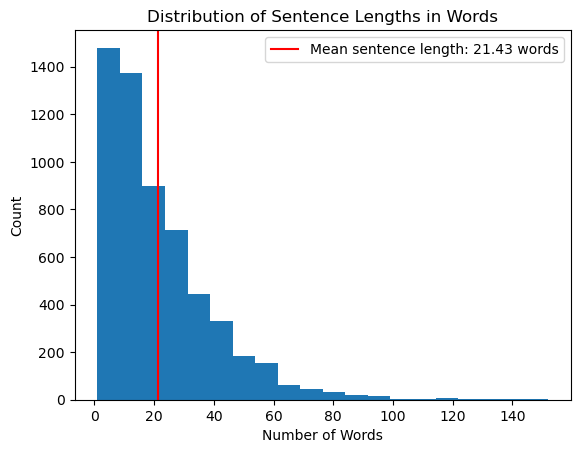

In [19]:
# Plot histogram of sentence lengths
mean = sum(lengths) / len(lengths)

plt.hist(lengths, bins=20)
plt.axvline(mean, c = 'red', label = f'Mean sentence length: {mean:.2f} words')
plt.title('Distribution of Sentence Lengths in Words')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.legend()